# Breast Cancer Survival Prediction

In this task, you are required to build a machine learning model that predicts a patient's **"Alive"** (surviving) or **"Dead"** (deceased) status based on **breast cancer data**.

## About the Dataset
The dataset is typically provided in a **BRCA.csv** file format. A sample list of columns is as follows: 
- **Patient_ID**: The unique ID of the patient
- **Age**: The patient's age
- **Gender**: The patient's gender (FEMALE/MALE)
- **Protein1, Protein2, Protein3, Protein4**: Expression levels of various proteins
- **Tumour_Stage**: The stage of cancer (I, II, III)
- **Histology**: The type of cancer (e.g., Infiltrating Ductal Carcinoma, Mucinous Carcinoma, etc.)
- **ER status, PR status, HER2 status**: Hormone/status values (Positive/Negative)
- **Surgery_type**: The type of surgical procedure (e.g., Lumpectomy, Simple Mastectomy, etc.)
- **Date_of_Surgery**: The date of the surgery
- **Date_of_Last_Visit**: The date of the last visit
- **Patient_Status**: Target column - Alive/Dead

Some columns in this dataset are **categorical** (e.g., `Gender`, `Tumour_Stage`), while others contain **numerical** (e.g., `Age`, `Protein1` etc.). Our target variable (`Patient_Status`) has two categories: "Alive" and "Dead".




## 1. Library Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


import warnings
warnings.filterwarnings('ignore')




In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## 2. Loading the Dataset and Initial Exploration


In [3]:
df = pd.read_csv('BRCA.csv')


df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [4]:
df.tail()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [6]:
df.shape

(341, 16)

In [7]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [8]:
df[df.isnull().any(axis=1)].shape[0]

24

In [9]:
column_list = df.columns.tolist()
print(column_list)

['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit', 'Patient_Status']


## 3. Data Cleaning and EDA


In [10]:
for col in df.columns:
        na_ratio = df[col].isna().mean()
        if na_ratio > 0.4:  
            df.drop(columns=[col], inplace=True)
        elif df[col].dtype == 'object' or df[col].isna().sum() < 11:
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:  
            df[col].fillna(df[col].mean(), inplace=True)

In [11]:
df[df.isnull().any(axis=1)].shape[0]

0

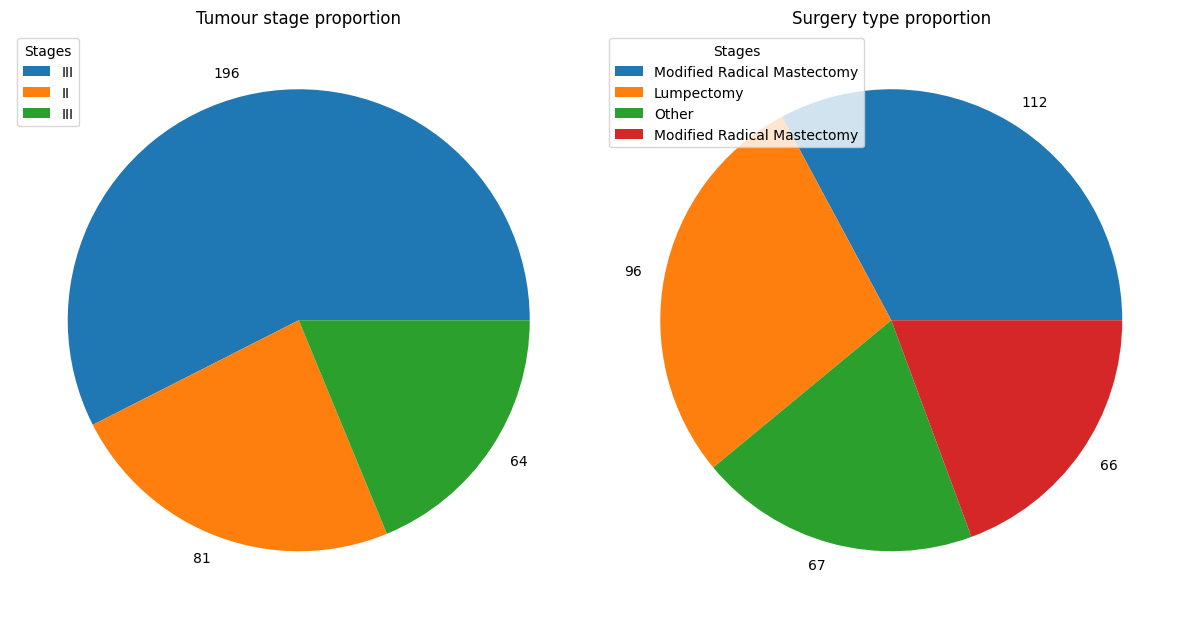

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 12)) 

axes[0].pie( df['Tumour_Stage'].value_counts(), labels =df['Tumour_Stage'].value_counts())


axes[0].legend(df['Tumour_Stage'].values, title="Stages", loc="upper left")

axes[0].set_title("Tumour stage proportion")


axes[1].pie(df['Surgery_type'].value_counts(), labels =df['Surgery_type'].value_counts())

axes[1].legend(df['Surgery_type'].values, title="Stages", loc="upper left")

axes[1].set_title("Surgery type proportion")

plt.tight_layout()


In [13]:
df.select_dtypes(include='object').nunique()

Patient_ID            334
Gender                  2
Tumour_Stage            3
Histology               3
ER status               1
PR status               1
HER2 status             2
Surgery_type            4
Date_of_Surgery       181
Date_of_Last_Visit    285
Patient_Status          2
dtype: int64

## 4. Encoding Categorical Columns


In [14]:
df['Patient_Status'].unique()

array(['Alive', 'Dead'], dtype=object)

In [15]:
df['Tumour_Stage'] = df['Tumour_Stage'].replace({'I': 1, 'II': 2, 'III': 3})
df['Histology'] = df['Histology'].replace({'Infiltrating Ductal Carcinoma': 1, 'Mucinous Carcinoma': 2, 'Infiltrating Lobular Carcinoma': 3})
df['ER status'] = df['ER status'].replace({'Positive': 1, 'Negative': 0})
df['PR status'] = df['PR status'].replace({'Positive': 1, 'Negative': 0})
df['HER2 status'] = df['HER2 status'].replace({'Positive': 1, 'Negative': 0})
df['Gender'] = df['Gender'].replace({'MALE': 0, 'FEMALE': 1})
df['Surgery_type'] = df['Surgery_type'].replace({'Modified Radical Mastectomy': 1, 'Lumpectomy': 2,'Simple Mastectomy':3, 'Other': 0})

df['Patient_Status'] = df['Patient_Status'].replace({'Dead': 1, 'Alive': 0})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          341 non-null    object 
 1   Age                 341 non-null    float64
 2   Gender              341 non-null    int64  
 3   Protein1            341 non-null    float64
 4   Protein2            341 non-null    float64
 5   Protein3            341 non-null    float64
 6   Protein4            341 non-null    float64
 7   Tumour_Stage        341 non-null    int64  
 8   Histology           341 non-null    int64  
 9   ER status           341 non-null    int64  
 10  PR status           341 non-null    int64  
 11  HER2 status         341 non-null    int64  
 12  Surgery_type        341 non-null    int64  
 13  Date_of_Surgery     341 non-null    object 
 14  Date_of_Last_Visit  341 non-null    object 
 15  Patient_Status      341 non-null    int64  
dtypes: float

## 5. Model Building


In [17]:
X = df.drop(['Date_of_Surgery', 'Date_of_Last_Visit', 'Patient_Status', 'Patient_ID'], axis = 1)
y = df['Patient_Status']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [22]:
model = SVC(C=1.0, kernel='rbf')

model.fit(X_train, y_train)


train_pred = model.predict(X_train)

train_score = accuracy_score(y_train, train_pred)

print(train_score)

y_pred = model.predict(X_test)

y_score = accuracy_score(y_test, y_pred)


print(y_score)

0.8169934640522876
0.7142857142857143


## 6. Example Prediction


In [26]:
X_train.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type
5,84.0,0,-0.081872,1.7241,-0.057335,0.043025,3,1,1,1,0,1
208,49.0,1,-0.144410,2.3240,-0.707440,0.718950,3,1,1,1,0,1
331,61.0,1,-0.719470,2.5485,-0.150240,0.339680,2,1,1,1,0,2
110,38.0,1,-0.629850,2.2999,0.113460,-1.036800,2,3,1,1,0,2
76,68.0,1,-0.826320,1.6912,-0.133490,-0.182140,2,1,1,1,0,0


In [27]:
sample = [36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1, 1, 2, 2]

sample = np.array(sample).reshape(1, -1)

sample_pred =  model.predict(sample)

sample_pred 

array([0])

## 7. Additional Steps and Suggestions

Bu addımda:
- Modelin yekun performansını qeyd edin (accuracy və ya digər metrikalar). 
- Hansı xüsusiyyətlərin daha vacib ola biləcəyinə dair izah verin.
- Daha geniş dataset və ya fərqli modellərlə nəticənin necə dəyişə biləcəyindən danışın.

**Uğurlar!**